<center><h1> Kriptografija i sigurnost mreža </h1>
<h1>Zadaća 1</h1>
<h2>Mihael Petrinjak</h2></center>

## Zadatak 1

Definiramo funkcije za pomak slova ulijevo.

In [1]:
def previous(c):
    c = c.upper()
    if c == "A" : return "Z"
    else : return chr(ord(c)-1)
    
def rewind(txt):
    rez = ""
    for c in txt:
        rez = rez + previous(c)
    return rez

Ispisat ćemo niz riječi dobivenih uzastopnim korištenjem funkcije `rewind`.

In [2]:
sifrat = "STLTRJY"

for i in range(1,10):
    sifrat = rewind(sifrat)
    print(f"{i} : {sifrat}")

1 : RSKSQIX
2 : QRJRPHW
3 : PQIQOGV
4 : OPHPNFU
5 : NOGOMET
6 : MNFNLDS
7 : LMEMKCR
8 : KLDLJBQ
9 : JKCKIAP


Vidimo da se u prvih 10 pomaka na mjestu 5 javlja riječ **NOGOMET**.

## Zadatak 2

Prvo uredimo šifrat u string bez separatora.

In [3]:
sifrat = '''HEDYM LNVEL DCNCF QLILS TFRHL QIDXT OROLC QFUMF
WQLBD NCLTO RBTFI LNCYF IODNT AYTYD QILXF ITILX
FYTNC TFWGD DMADS LCDYD OMTHT CTEWR MITQD NGFIU
YFQDM DODXI LTOMF OTFQD NGILC NXFIT OMFOS TRUDY TOR'''

(sifrat := sifrat.replace(" ", "").replace("\n", ""))

'HEDYMLNVELDCNCFQLILSTFRHLQIDXTOROLCQFUMFWQLBDNCLTORBTFILNCYFIODNTAYTYDQILXFITILXFYTNCTFWGDDMADSLCDYDOMTHTCTEWRMITQDNGFIUYFQDMDODXILTOMFOTFQDNGILCNXFITOMFOSTRUDYTOR'

Brojimo ponavljanja individualnih slova u šifratu.

In [4]:
frekvencija = {}

for c in sifrat :
    try : frekvencija[c] += 1
    except KeyError : frekvencija[c] = 1

Za prikaz dijagrama potrebna nam je biblioteka `matplotlib`.

In [5]:
import matplotlib.pyplot as plt

Nakon sortiranja vrijednosti dobivamo sljedeći prikaz.

<BarContainer object of 22 artists>

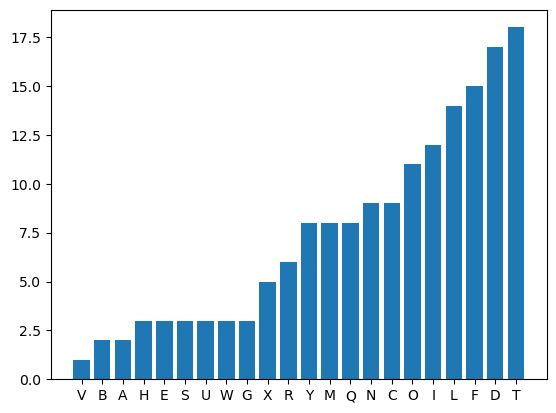

In [6]:
frekvencija = {k: v for k, v in sorted(frekvencija.items(), key=lambda item: item[1])}
plt.bar(frekvencija.keys(), frekvencija.values())

Na isti način prikazujemo zastupljenost bigrama.

In [7]:
frekvencija_b = {}

for i in range(0,len(sifrat)-1) :
    try : frekvencija_b[sifrat[i:i+2]] += 1
    except KeyError : frekvencija_b[sifrat[i:i+2]] = 1

Radi preglednosti izbacujemo one koji se javljaju manje od 3 puta.

<BarContainer object of 16 artists>

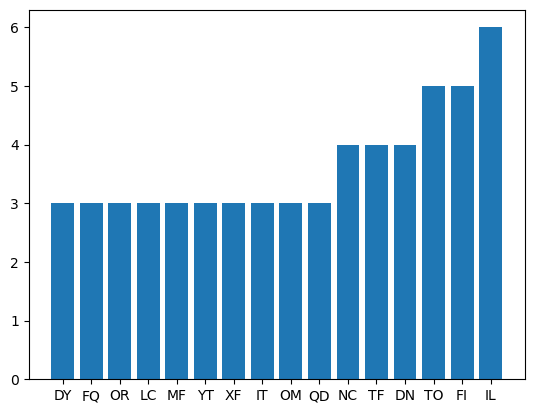

In [8]:
frekvencija_b = {k : v for k, v in frekvencija_b.items() if v > 2}
frekvencija_b = {k: v for k, v in sorted(frekvencija_b.items(), key=lambda item: item[1])}
plt.bar(frekvencija_b.keys(), frekvencija_b.values())

5 najfrekventnijih slova u šifratu su **T, D, F, L, I**.<br>
5 najfrekventnijih bigrama su **IL, FI, TO, DN, TF**.

Pišemo indeks svakog slova u $Z_{26}$

In [9]:
(indeks := {c : ord(c) - 65 for c in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"})

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

Potrebna nam je mapa invertibilnih brojeva i njihovih inverza.

In [10]:
inverse = {
    1:1,
    3:9,
    5:21,
    7:15,
    9:3,
    11:19,
    15:7,
    17:23,
    19:11,
    21:5,
    23:17,
    25:25
}

Definiramo funkcije za šifriranje i dešifriranje.

In [11]:
def e(a,b,txt) :
    rez = ""
    for c in txt:
        rez += chr(65 + (indeks[c] * a + b) % 26)
    return rez

def d(a,b,txt) :
    rez = ""
    for c in txt:
        rez += chr(65 + (inverse[a]*(indeks[c] - b)) % 26)
    return rez

Kod metode pokušaja i pogrešaka koristit ćemo početni komad teksta.

In [12]:
komad = sifrat[0:25]

Prva pretpostavka je da se A preslikava u najfrekventnije slovo u šifratu T, osnosno $d_k(0) \equiv 19 \ (mod 26)$. To znači da $a \cdot 0 + b \equiv b \equiv 19 \ (mod 26)$. Ispitujemo za sve moguće vrijednosti $a$ izlaze funkcije `d`.

In [13]:
for a in inverse.keys() :
    print(f"a={a} : {d(a,19,komad)}")

a=1 : OLKFTSUCLSKJUJMXSPSZAMYOS
a=3 : WVMTPGYSVGMDYDEZGFGRAEIWG
a=5 : IXCBJOEQXOCHEHSPODOFASKIO
a=7 : CJUXZKOEJKUFOFYHKRKLAYWCK
a=9 : QHEPFCIGHCEBIBKRCTCXAKUQC
a=11 : GBIRXEQMBEIPQPUVEZEHAUOGE
a=15 : UZSJDWKOZWSLKLGFWBWTAGMUW
a=17 : KTWLVYSUTYWZSZQJYHYDAQGKY
a=19 : YRGDBQMWRQGVMVCTQJQPACEYQ
a=21 : SDYZRMWKDMYTWTILMXMVAIQSM
a=23 : EFOHLUCIFUOXCXWBUVUJAWSEU
a=25 : MPQVHIGYPIQRGRODILIBAOCMI


Niti jedan rezultat nema smisla pa odbacujemo mogućnost $b \equiv 19$. <br>
Iduća pretpostavka je A $\mapsto$ B, odnosno $b \equiv 3 \ (mod 26)$.

In [14]:
for a in inverse.keys() :
    print(f"a={a} : {d(a,3,komad)}")

a=1 : EBAVJIKSBIAZKZCNIFIPQCOEI
a=3 : KJAHDUMGJUARMRSNUTUFOSWKU
a=5 : GVAZHMCOVMAFCFQNMBMDYQIGM
a=7 : IPADFQUKPQALULENQXQRGECIQ
a=9 : MDALBYECDYAXEXGNYPYTWGQMY
a=11 : YTAJPWIETWAHIHMNWRWZSMGYW
a=15 : CHARLESWHEATSTONEJEBIOUCE
a=17 : OXAPZCWYXCADWDUNCLCHEUKOC
a=19 : SLAXVKGQLKAPGPWNKDKJUWYSK
a=21 : UFABTOYMFOAVYVKNOZOXCKSUO
a=23 : QRATXGOURGAJOJINGHGVMIEQG
a=25 : WZAFRSQIZSABQBYNSVSLKYMWS


Vidimo da za par **(15, 3) = K** otvoreni tekst ima smisla. Dekriptirajmo cijeli šifrat.

In [15]:
d(15,3,sifrat)

'CHARLESWHEATSTONEJEBIOUCENJAKIZUZETNOPLODNEMASTEIZUMIOJESTROJZASIFRIRANJEKOJIJEKORISTIODVAALFABETARAZLICITIHDULJINASVOJPRONALAZAKJEIZLOZIONASVJETSKOJIZLOZBIUPARIZU'

**CHARLES WHEATSTONE JE BIO UČENJAK IZUZETNO PLODNE MAŠTE. IZUMIO JE STROJ ZA ŠIFRIRANJE KOJI JE KORISTIO DVA ALFABETA RAZLIČITIH DULJINA. SVOJ PRONALAZAK JE IZLOŽIO NA SVJETSKOJ IZLOŽBI U PARIZU.**

## Zadatak 3

Isto kao u prethodnom zadatku uređujemo šifrat da bude pogodan za analizu.

In [16]:
sifrat = '''LZNRV RDFTK XJGVR VFRCH ATKTN RHRXT FZHRZ KKZWT
SZFRZ GCAXZ AGZST KRITH RSTVF RCHAN AUROJ FOZGT
LTOJX RITNZ AUNTG ZJKAL RKTIT KZVRA YHRBA UNTGT
WRNRG JGRDF RFTKR CTOZW TSZFR ZGKOR BALRI YZVFR
CHRFT KOZIS TWTLN OTACF ROTHZ NOZ'''

(sifrat := sifrat.replace(" ", "").replace("\n", ""))

'LZNRVRDFTKXJGVRVFRCHATKTNRHRXTFZHRZKKZWTSZFRZGCAXZAGZSTKRITHRSTVFRCHANAUROJFOZGTLTOJXRITNZAUNTGZJKALRKTITKZVRAYHRBAUNTGTWRNRGJGRDFRFTKRCTOZWTSZFRZGKORBALRIYZVFRCHRFTKOZISTWTLNOTACFROTHZNOZ'

Prikazujemo frekvencije slova i bigrama u šifratu.

<BarContainer object of 22 artists>

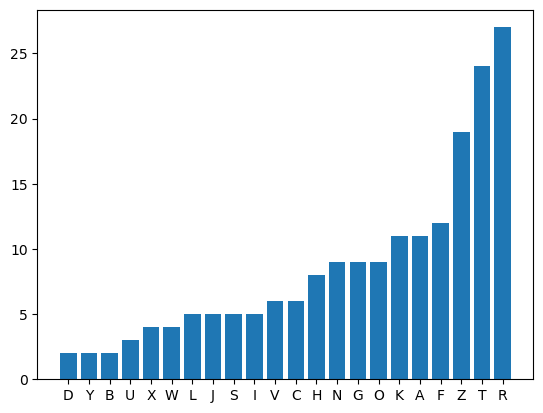

In [17]:
frekvencija = {}

for c in sifrat :
    try : frekvencija[c] += 1
    except KeyError : frekvencija[c] = 1
        
frekvencija = {k: v for k, v in sorted(frekvencija.items(), key=lambda item: item[1])}
plt.bar(frekvencija.keys(), frekvencija.values())

<BarContainer object of 52 artists>

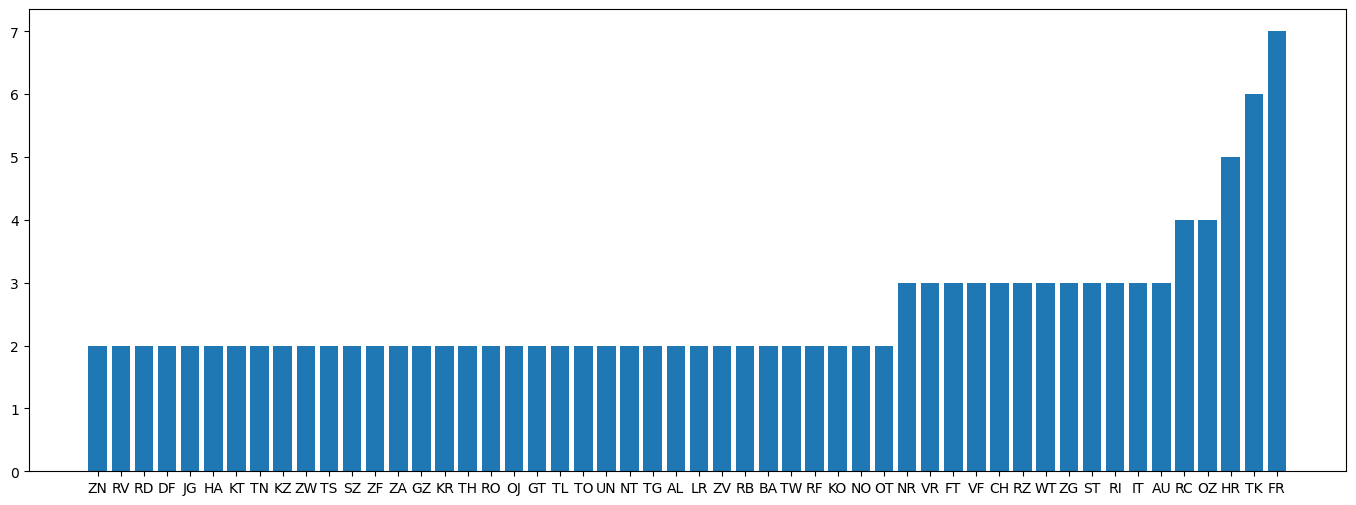

In [18]:
frekvencija_b = {}

for i in range(0,len(sifrat)-1) :
    try : frekvencija_b[sifrat[i:i+2]] += 1
    except KeyError : frekvencija_b[sifrat[i:i+2]] = 1
        
frekvencija_b = {k : v for k, v in frekvencija_b.items() if v > 1}
frekvencija_b = {k: v for k, v in sorted(frekvencija_b.items(), key=lambda item: item[1])}
plt.figure(figsize=(17,6))
plt.bar(frekvencija_b.keys(), frekvencija_b.values())

Pronađimo slova koja se ne pojavljuju u šifratu.

In [19]:
for c in indeks.keys() :
    try : frekvencija[c]
    except KeyError : print(c, end = " ")

E M P Q 

Funkcija `kljuc` ispisuje u jedan redak sva slova alfabeta, a ispod svakog slova njegov šifrat. Parametar funkcije je rječnik s nekim pretpostavkama na preslikavanje $e_K$.

In [20]:
def kljuc(f) :
    
    abc = indeks.keys()
    for c in abc : print(c, end = " ")
    print("")
    
    for c in abc :
        try : print(f[c], end = " ")
        except KeyError : print("_", end = " ")

Najprirodnije je uzeti da se NA preslikava u FR jer je najfrekventniji bigram. E, M, P, Q se ne pojavljuju u šifratu. Reči ćemo za sad da su to Q, W, X, Y u hrvatskom jeziku.

In [21]:
funkcija = {
    # 
    "N" : "F",
    "A" : "R",
    #
    "Q" : "E",
    "W" : "M",
    "X" : "P",
    "Y" : "Q"
}
    
kljuc(funkcija)

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 
R _ _ _ _ _ _ _ _ _ _ _ _ F _ _ E _ _ _ _ _ M P Q _ 

Ne može se A preslikavati u R jer tada nema slike od Z. Pretpostavljamo da je $A \mapsto T$ jer je drugo najfrekventnije slovo u šifratu. Logično je pretpostaviti da $AN \mapsto TK$ jer je AN jedini od najčešćih bigrama u hrv. jeziku. Pretpostavimo da $JE \mapsto FR$.

In [22]:
funkcija = {
    #
    "N" : "K",
    "A" : "T",
    #
    "J" : "F",
    "E" : "R",
    #
    "I" : "z",
    "O" : "z",
    #
    "Q" : "E",
    "W" : "M",
    "X" : "P",
    "Y" : "Q"
}
    
kljuc(funkcija)

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 
T _ _ _ R _ _ _ z F _ _ _ K z _ E _ _ _ _ _ M P Q _ 

Z je treće najfrekventnije slovo u šifratu pa bi trebalo biti slika ili od I ili od O, ali teško da postoje takve riječi u hrv. jeziku. Slično bi dobili za $JE \mapsto HR$. Probajmo $JE \mapsto OZ$. Uz pretpostavku da se WXY ne javljaju u ključnoj riječi, stavimo ih između T i Z. To još povlači da se U i V moraju javiti u k.r. Znači da bi R mogla biti slika od I ili O, ali KR se isto tako rijetko javlja na kraju hrvatskih riječi pa uzimamo da je slika od I.

In [23]:
funkcija = {
    #
    "N" : "K",
    "A" : "T",
    #
    "J" : "O",
    "E" : "Z",
    #
    "I" : "R",
    #
    "Q" : "E",
    "W" : "M",
    "X" : "P",
    "Y" : "Q",
    # 
    "B" : "W",
    "C" : "X",
    "D" : "Y"
}
    
kljuc(funkcija)

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 
T W X Y Z _ _ _ R O _ _ _ K _ _ E _ _ _ _ _ M P Q _ 

Između Q i T moraju doći R i S, ali je R već iskorišteno.

In [24]:
funkcija.update({"Z" : "S"})
kljuc(funkcija)

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 
T W X Y Z _ _ _ R O _ _ _ K _ _ E _ _ _ _ _ M P Q S 

Isprobajmo s trenutnim znanjem otkriti otvoreni tekst. Možda uspijemo popuniti neke rupe. `parc_d` dešifrira znakove za koje postoji informacija iz rječnika `dic`, a ostale mijenja s `_`.

In [25]:
def key(dic, value) :
    for item in dic.items() :
        if item[1] == value : return item[0]
    return "_"

def parc_d(txt, dic) :
    
    for c in txt :
        print(key(dic, c), end="")

`prikazi` koristi `parc_d` i paralelno slaže šifrat i otvoreni tekst.

In [26]:
def prikazi(funk) :
    print(sifrat[:95])
    parc_d(sifrat[:95], funk)
    print("\n")
    print(sifrat[95:])
    parc_d(sifrat[95:], funk)

In [27]:
prikazi(funkcija)

LZNRVRDFTKXJGVRVFRCHATKTNRHRXTFZHRZKKZWTSZFRZGCAXZAGZSTKRITHRSTVFRCHANAUROJFOZGTLTOJXRITNZAUNTG
_E_I_I__ANC___I__I___ANA_I_ICA_E_IENNEBAZE_IE___CE__EZANI_A_IZA__I______IJ__JE_A_AJ_CI_A_E___A_

ZJKALRKTITKZVRAYHRBAUNTGTWRNRGJGRDFRFTKRCTOZWTSZFRZGKORBALRIYZVFRCHRFTKOZISTWTLNOTACFROTHZNOZ
E_N__INA_ANE_I_D_I____A_ABI_I___I__I_ANI_AJEBAZE_IE_NJI___I_DE__I__I_ANJE_ZABA__JA___IJA_E_JE

Analizom teksta uočavamo gdje bi mogla doći slova L, T, R zbog riječi ANA(L)I(T)ICA(R). Nadopunom preslikavanja dobivamo nove hintove i uviđamo ostale korake 2., 3., 4.

In [28]:
novi = {
    # 1.
    "L" : "N",
    "T" : "H",
    "R" : "F",
    # 2.
    "S" : "G",
    "F" : "D",
    # 3.
    "V" : "L",
    "U" : "J",
    # 4.
    "K" : "V"
}

novi.update(funkcija)
prikazi(novi)

LZNRVRDFTKXJGVRVFRCHATKTNRHRXTFZHRZKKZWTSZFRZGCAXZAGZSTKRITHRSTVFRCHANAUROJFOZGTLTOJXRITNZAUNTG
VELIKIFRANCUSKIKRI_T_ANALITICARETIENNEBAZERIES__CE_SEZANI_ATIZAKRI_T_L__IJURJESAVAJUCI_ALE__LAS

ZJKALRKTITKZVRAYHRBAUNTGTWRNRGJGRDFRFTKRCTOZWTSZFRZGKORBALRIYZVFRCHRFTKOZISTWTLNOTACFROTHZNOZ
EUN_VINA_ANEKI_DTI___LASABILISUSIFRIRANI_AJEBAZERIESNJI__VI_DEKRI_TIRANJE_ZABAVLJA__RIJATELJE

In [29]:
kljuc(novi)

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 
T W X Y Z D _ _ R O V N _ K _ _ E F G H J L M P Q S 

Vidimo da se radi o riječi D _ _ R O V N _ K ? ? i da sadrži sigurno slova I, U. Slutimo da je Dubrovnik.

In [32]:
novi.update({
    "G" : "U",
    "H" : "B",
    "M" : "I",
    "O" : "A",
    "P" : "C",
    "Z" : "S"
})

kljuc(novi)

A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 
T W X Y Z D U B R O V N I K A C E F G H J L M P Q S 

Pogledajmo sada tekst dobiven inverzom preslikavanja `novi`.

In [33]:
prikazi(novi)

LZNRVRDFTKXJGVRVFRCHATKTNRHRXTFZHRZKKZWTSZFRZGCAXZAGZSTKRITHRSTVFRCHANAUROJFOZGTLTOJXRITNZAUNTG
VELIKIFRANCUSKIKRIPTOANALITICARETIENNEBAZERIESPOCEOSEZANIMATIZAKRIPTOLOGIJURJESAVAJUCIMALEOGLAS

ZJKALRKTITKZVRAYHRBAUNTGTWRNRGJGRDFRFTKRCTOZWTSZFRZGKORBALRIYZVFRCHRFTKOZISTWTLNOTACFROTHZNOZ
EUNOVINAMANEKIODTIHOGLASABILISUSIFRIRANIPAJEBAZERIESNJIHOVIMDEKRIPTIRANJEMZABAVLJAOPRIJATELJE

Tekst ima smisla. Dakle **K = (DUBROVNIK, 5)**.